In [ ]:
import math 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import  DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

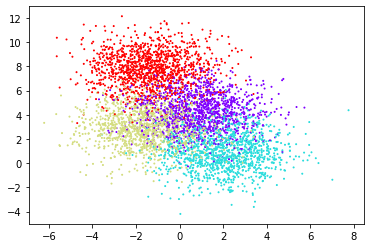

(4900, 2)
(100, 2)


In [ ]:
[X_train, y_train, X_test, y_test] = np.load("TP5a.npy",allow_pickle=True)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=1, cmap='rainbow');
plt.show()
print(np.shape(X_train))
print(np.shape(X_test))

In [ ]:
def visualize_classifier(model, X, y):
  ax = plt.gca()
  # Plot the training points
  ax.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap='rainbow',clim=(y.min(), y.max()), zorder=3)
  ax.axis('tight')
  ax.axis('off')
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  # Create a color plot with the results
  n_classes = len(np.unique(y))
  contours = ax.contourf(xx, yy, Z, alpha=0.3,levels=np.arange(n_classes + 1) - 0.5,cmap='rainbow', zorder=1)
  ax.set(xlim=xlim, ylim=ylim)
  plt.show()

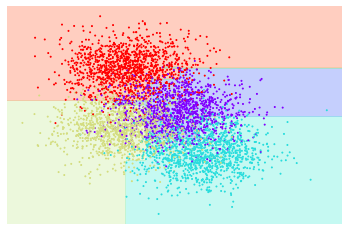

|--- feature_1 <= 5.19
|   |--- feature_0 <= -0.56
|   |   |--- feature_1 <= 3.31
|   |   |   |--- feature_1 <= 1.19
|   |   |   |   |--- feature_0 <= -1.49
|   |   |   |   |   |--- feature_1 <= 0.67
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_1 >  0.67
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  -1.49
|   |   |   |   |   |--- feature_1 <= 0.14
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.14
|   |   |   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  1.19
|   |   |   |   |--- feature_0 <= -1.50
|   |   |   |   |   |--- feature_0 <= -3.27
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_0 >  -3.27
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  -1.50
|   |   |   |   |   |--- feature_0 <= -0.79
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_0 >  -0.79
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_1 >  3.31
|   |

In [ ]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth = 6)
tree1.fit(X_train, y_train)
visualize_classifier(tree1, X_train, y_train)
#tree.plot_tree(tree1)
text_representation = tree.export_text(tree1)
print(text_representation)

In [ ]:
y_pred = tree1.predict(X_test)
C = confusion_matrix(y_test, y_pred)
print(C)
print(classification_report(y_test, y_pred))
print('Accuracy= ',accuracy_score(y_test, y_pred))

[[16  2  5  3]
 [ 3 24  0  0]
 [ 5  3 12  1]
 [ 3  0  0 23]]
              precision    recall  f1-score   support

           0       0.59      0.62      0.60        26
           1       0.83      0.89      0.86        27
           2       0.71      0.57      0.63        21
           3       0.85      0.88      0.87        26

    accuracy                           0.75       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.75      0.75      0.75       100

Accuracy=  0.75


In [ ]:
acuracy = []
depth_list = list(np.arange(1,20))
for depth in depth_list:
  tree1 = DecisionTreeClassifier(criterion='entropy', max_depth = depth)
  tree1.fit(X_train, y_train)
  y_pred = tree1.predict(X_test)
  acuracy.append(  accuracy_score(y_test, y_pred))


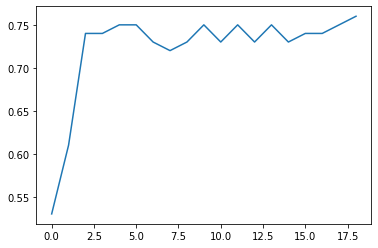

In [ ]:
plt.plot(acuracy)

19


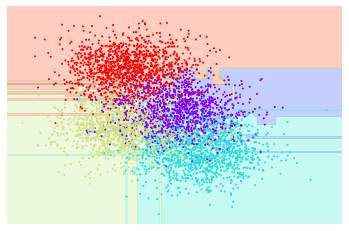

In [ ]:
best_max_depth = depth_list[np.argmax(acuracy)]
print(best_max_depth)
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth = best_max_depth)
tree1.fit(X_train, y_train)
y_pred = tree1.predict(X_test)
visualize_classifier(tree1, X_train, y_train)


In [ ]:
[X_train, y_train, X_test, y_test] = np.load("TP5b.npy",allow_pickle=True)
print(np.shape(X_train))
print(np.shape(y_test))
print(np.shape(X_test))
print(len(np.unique(y_test)))

FileNotFoundError: ignored

In [ ]:
acuracy = []
depth_list = list(np.arange(1,20))
for depth in depth_list:
  tree1 = DecisionTreeClassifier(criterion='entropy', max_depth = depth)
  tree1.fit(X_train, y_train)
  y_pred = tree1.predict(X_test)
  acuracy.append(  accuracy_score(y_test, y_pred))


In [ ]:
plt.plot(acuracy)

In [ ]:
best_max_depth = depth_list[np.argmax(acuracy)]
print(best_max_depth)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=1)
RF.fit(X_train, y_train)